In [ ]:
mkdir A3pract

In [ ]:
cd A3pract

/content/A3pract


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier   #to build decision tree classifier
from sklearn.metrics import ConfusionMatrixDisplay    #for printing confusion matrix
from sklearn.metrics import classification_report   #for evaluation of our confusion matrix
from sklearn.preprocessing import Binarizer   #to convert a column data from float to int 
from sklearn.model_selection import train_test_split    #for splitting data into training and testing
from sklearn.tree import plot_tree    #to print the tree
import matplotlib.pyplot as plt   #data visualization
import seaborn as sns   #data visualization

In [ ]:
df = pd.read_csv('Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.columns  #gives total columns we have

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
bit = Binarizer(threshold = 0.70)   #name (in short store it) the binarizer as bit 
                                    #threshold = 0.7 ---> val greater than 0.7 is converted to 1
y = bit.fit_transform(df[['Chance of Admit ']])#convert the column data float to int using fittransform
y.dtype

dtype('float64')

In [ ]:
y = y.astype('int')   #convert datatype of y column into integer
y   #output variable

In [ ]:
x = df.drop(columns = 'Chance of Admit ')
x   #input variable

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [ ]:
#performing the splitting of input and output data into training and testing data ,75: 25 ratio 
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.25)

In [ ]:
classify = DecisionTreeClassifier(random_state=0)   #name decision tree classifier model as classify

In [ ]:
classify.fit(x_train, y_train)    #fit/train the model

DecisionTreeClassifier(random_state=0)

In [ ]:
ypred = classify.predict(x_test)    #make predictions using the trained model
ypred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
y_test = y_test.reshape(100)    #reshape------------> convert into 1D or 2D array
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
#create a data dataframe storing and actual and predicted values of our model
data = pd.DataFrame({'Actual': y_test, 
                     'Predicted': ypred
})
data

,Actual,Predicted
0,1,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
95,1,0
96,1,1
97,0,1
98,1,0


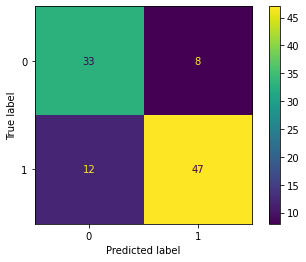

In [ ]:
ConfusionMatrixDisplay.from_predictions(data['Actual'], data['Predicted'])    #print confusion matrix

In [ ]:
print(classification_report(data['Actual'],data['Predicted']))    #print accuracy, precision, recall and f1_score values

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.85      0.80      0.82        59

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



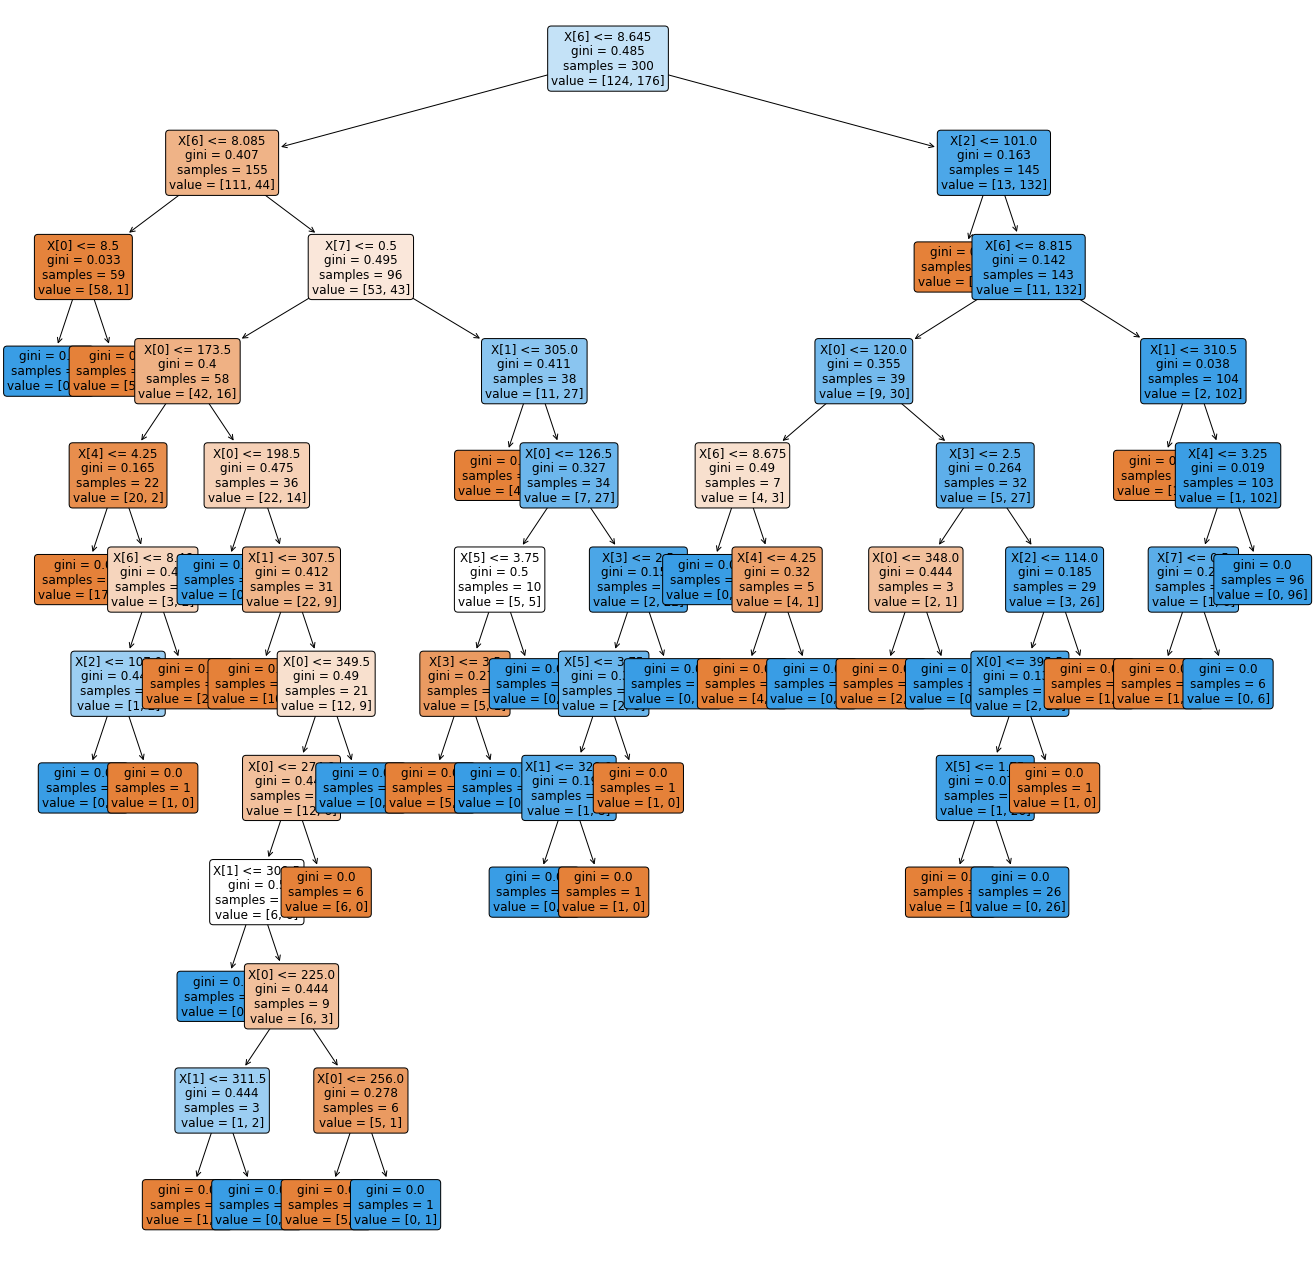

In [ ]:
plt.figure(figsize=(23,23))
plot_tree(classify, fontsize = 12, filled = True, rounded = True);#filled = for coloring, 
                                                                  #rounded = blaunted shape of rectangle